In [ ]:
# Import Necessary Dependancies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load the dataset
tweet = pd.read_csv('/content/tweet.csv',encoding='latin')
tweet.sample(3)

,tweets,class
20243,Its #ironic that many pray to God for things t...,figurative
72469,"ahhh, how I ""love"" it when people ""give"" credi...",sarcasm
67426,@marcyTHW probably William Nylander. Or Connor...,sarcasm


In [ ]:
#print first five rows
print(tweet.head())

                                              tweets       class
0  Be aware  dirty step to get money  #staylight ...  figurative
1  #sarcasm for #people who don't understand #diy...  figurative
2  @IminworkJeremy @medsingle #DailyMail readers ...  figurative
3  @wilw Why do I get the feeling you like games?...  figurative
4  -@TeacherArthurG @rweingarten You probably jus...  figurative


In [ ]:
#print last five rows
print(tweet.tail())

                                                  tweets    class
81403  Photo: Image via We Heart It http://t.co/ky8Nf...  sarcasm
81404  I never knew..I better put this out to the Uni...  sarcasm
81405  hey just wanted to say thanks @ puberty for le...  sarcasm
81406  I'm sure coverage like the Fox News Special â...  sarcasm
81407  @skeyno16 at u13?! I won't believe it until I ...  sarcasm


In [ ]:
#print shape of dataset
print(tweet.shape)

(81408, 2)


In [ ]:
#Columns or features in data
tweet.columns

Index(['tweets', 'class'], dtype='object')

In [ ]:
#lenth of the dataset
print('Lenth of dataset : ',len(tweet))

Lenth of dataset :  81408


In [ ]:
#Data information
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81408 entries, 0 to 81407
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweets  81408 non-null  object
 1   class   81408 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [ ]:
#Discription of dataset
tweet.describe(include = np.object)

,tweets,class
count,81408,81408
unique,67997,4
top,$$$=&gt;&gt; #peace #love #freedom\n#fight for...,figurative
freq,14,21238


In [ ]:
#Datatyes of columns
tweet.dtypes

tweets    object
class     object
dtype: object

In [ ]:
#Checking for null values
print(tweet.isnull().sum())

tweets    0
class     0
dtype: int64


Hence, there are no null values

In [ ]:
#Checking for unique class values
tweet['class'].unique()

array(['figurative', 'irony', 'regular', 'sarcasm'], dtype=object)

In [ ]:
#Value counts for each class
tweet['class'].value_counts()

figurative    21238
irony         20894
sarcasm       20681
regular       18595
Name: class, dtype: int64

In [ ]:
'''#replace class values with 0,1,2 and 3 respectively
tweet['label'] = tweet['class'].map({'figurative':0,'irony':1, 'sarcasm':2, 'regular':3})'''
#Encoding target variable
from sklearn.preprocessing import LabelEncoder
tweet['Label'] = LabelEncoder().fit_transform(tweet['class'])
tweet.sample()

,tweets,class,Label
1042,The best kinda people on sc are the ones who t...,figurative,0


In [ ]:
#Apply length to tweet
tweet['length'] = tweet['tweets'].apply(len)

In [ ]:
tweet.sample(3)

,tweets,class,Label,length
36411,@DragonCon_ATL @Cynnthetic U look soooo happy!...,irony,1,77
67957,For 45 minutes a day at work in the break room...,sarcasm,3,121
61353,@iMxyy__ LOL i smell #sarcasm there HAHAHAHAHA,sarcasm,3,46


In [ ]:
#Checking for dulicate values
tweet.duplicated().sum()

49

In [ ]:
#drop the dulicates
cleaned_tweet = tweet.drop_duplicates(ignore_index=True)

In [ ]:
cleaned_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81359 entries, 0 to 81358
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweets  81359 non-null  object
 1   class   81359 non-null  object
 2   Label   81359 non-null  int64 
 3   length  81359 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.5+ MB


# **Data Visualization**

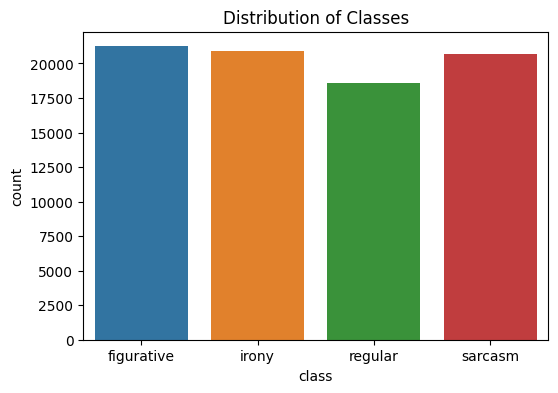

In [ ]:
#Distribution of class
plt.figure(figsize=(6,4))
sns.countplot(x='class', data=cleaned_tweet)
plt.title('Distribution of Classes')
plt.show()

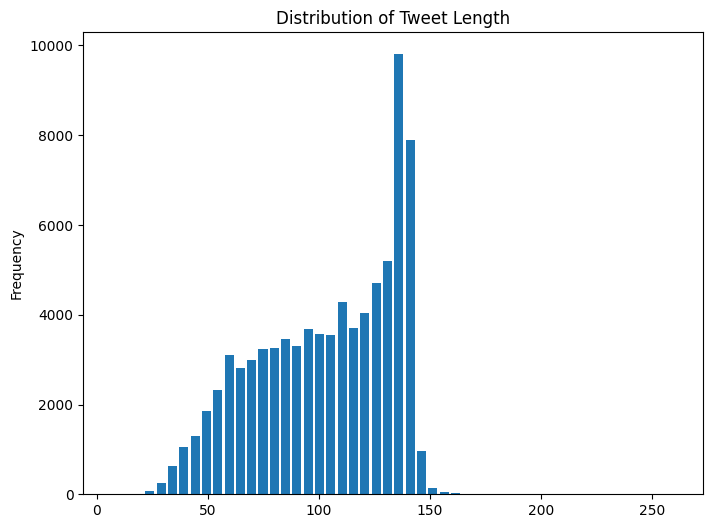

In [ ]:
# Length distribution
plt.figure(figsize=(8,6))
cleaned_tweet['length'].plot(kind='hist',bins=50, rwidth=0.8)
plt.title('Distribution of Tweet Length')
plt.show()

# Text cleaning & Preprocessing

In [ ]:
#convert to lowercase
cleaned_tweet['tweets'] = cleaned_tweet['tweets'].str.lower()

In [ ]:
#Remove special characters and punctuations
import re
cleaned_tweet['tweets'] = cleaned_tweet['tweets'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

In [ ]:
#Remove numbers
cleaned_tweet['tweets'] = cleaned_tweet['tweets'].apply(lambda x: re.sub(r'\d+', '', x))

In [ ]:
#Remove html tags
from bs4 import BeautifulSoup
cleaned_tweet['tweets'] = cleaned_tweet['tweets'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())

In [ ]:
#Remove extra space
cleaned_tweet['tweets'] = cleaned_tweet['tweets'].apply(lambda x: ' '.join(x.split()))


In [ ]:
# Function to remove urls
def remove_url(tweets):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', tweets)

# Apply url removal function on given dataset.
cleaned_tweet['tweets'] = cleaned_tweet['tweets'].apply(lambda tweets: remove_url(tweets))
cleaned_tweet.head()

,tweets,class,Label,length
0,be aware dirty step to get money staylight sta...,figurative,0,110
1,sarcasm for people who dont understand diy art...,figurative,0,80
2,iminworkjeremy medsingle dailymail readers bei...,figurative,0,132
3,wilw why do i get the feeling you like games s...,figurative,0,55
4,teacherarthurg rweingarten you probably just m...,figurative,0,75


In [ ]:
#Tokenization
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
cleaned_tweet['tweets'] = cleaned_tweet['tweets'].apply(word_tokenize)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
cleaned_tweet.sample()

,tweets,class,Label,length
74654,"[thedid, perezhilton, no, flippin, clue, i, wi...",sarcasm,3,103


In [ ]:
#Remove stop words
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
cleaned_tweet['tweets'] = cleaned_tweet['tweets'].apply(lambda x: [word for word in x if word not in stop_words])

In [ ]:
#Lemmatization
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemma = WordNetLemmatizer()
cleaned_tweet['tweets'] = cleaned_tweet['tweets'].apply(lambda x: [lemma.lemmatize(word) for word in x])

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
cleaned_tweet.sample(3)

,tweets,class,Label,length
19928,"[yet, terrorist, prison, sarcasm, culprit, sui...",figurative,0,128
55933,"[mcdonnell, sorry, ira, comment, shadow, chanc...",regular,2,136
13978,"[oh, yeah, cup, driver, sure, help, fill, stan...",figurative,0,105


In [ ]:
from wordcloud import WordCloud
from nltk import FreqDist
# Explore the distribution of words or tokens
all_tokens = [token for tweet_tokens in cleaned_tweet['tweets'] for token in tweet_tokens]

In [ ]:
# Visualize the most frequent words using a word cloud
all_tokens_text = ' '.join(all_tokens)
wordcloud = WordCloud(width=800, height=400, background_color='white', random_state=42).generate(all_tokens_text)

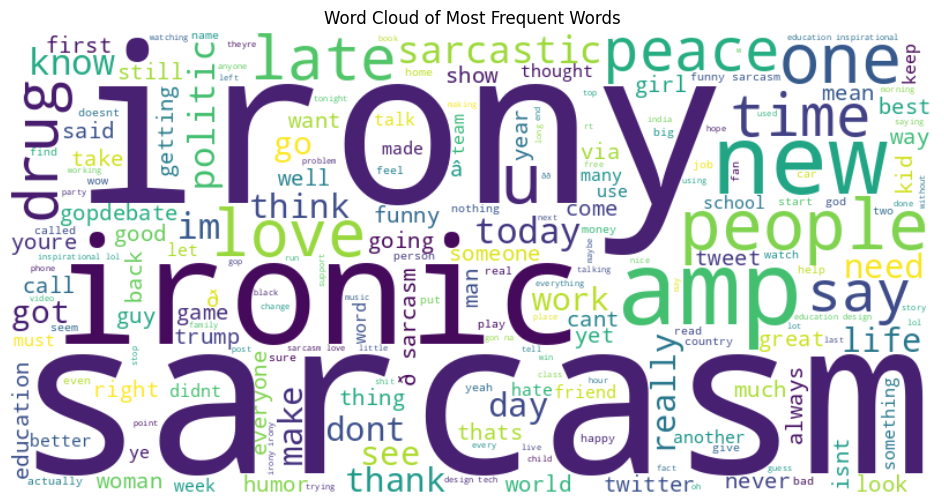

In [ ]:
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Frequent Words')
plt.show()

In [ ]:
cleaned_tweet['class'].value_counts()

figurative    21235
irony         20877
sarcasm       20678
regular       18569
Name: class, dtype: int64

In [ ]:
figurative = cleaned_tweet[cleaned_tweet['Label']==0]
figurative.shape

(21235, 4)

In [ ]:
irony = cleaned_tweet[cleaned_tweet['Label']==1]
irony.shape

(20877, 4)

In [ ]:
sarcasm = cleaned_tweet[cleaned_tweet['Label']==2]
sarcasm.shape

(18569, 4)

In [ ]:
regular = cleaned_tweet[cleaned_tweet['Label']==3]
regular.shape

(20678, 4)

In [ ]:
from nltk.tokenize import word_tokenize

def wordcloud(data, class_name):
     # Visualize the most frequent words using a word cloud
    all_tokens_text = ' '.join(all_tokens)
    wordcloud = WordCloud(width=800, height=400, background_color='white', random_state=42).generate(all_tokens_text)

    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud of Most Frequent Words for {class_name} Class')
    plt.show()


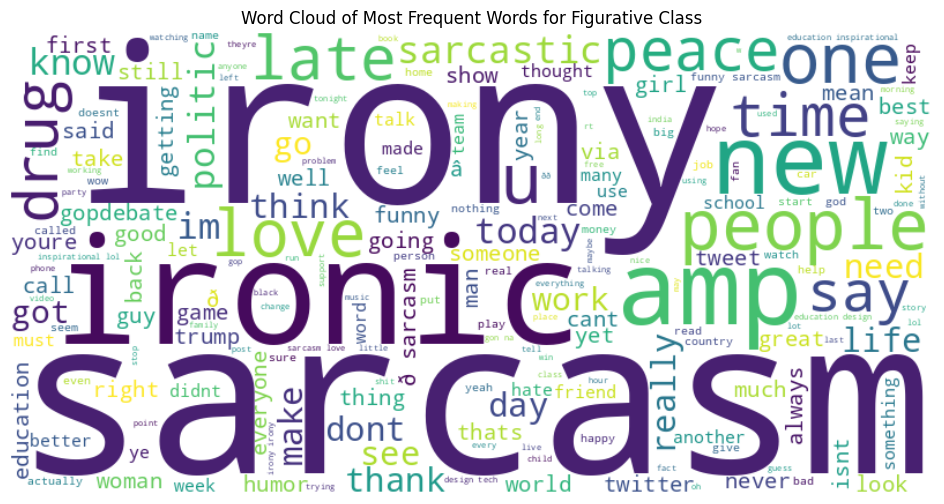

In [ ]:
# Visualize for each sentiment class
wordcloud(figurative, 'Figurative')

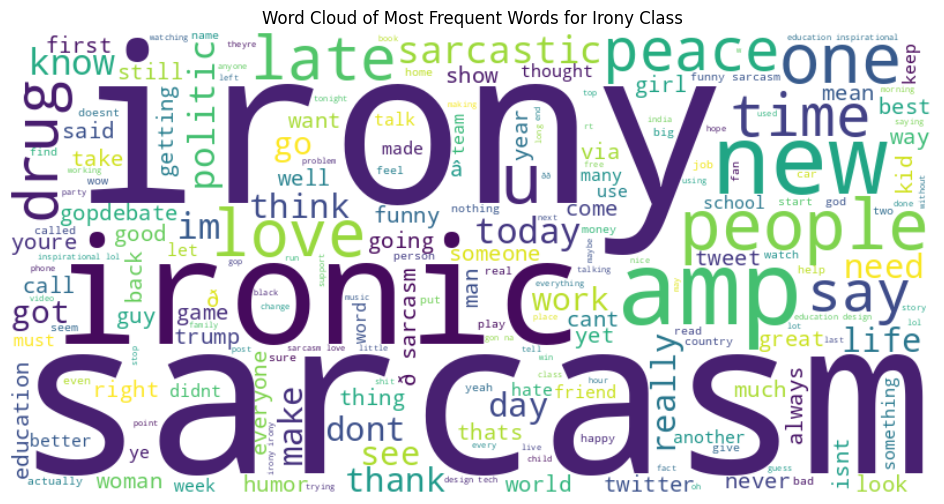

In [ ]:
wordcloud(irony, 'Irony')

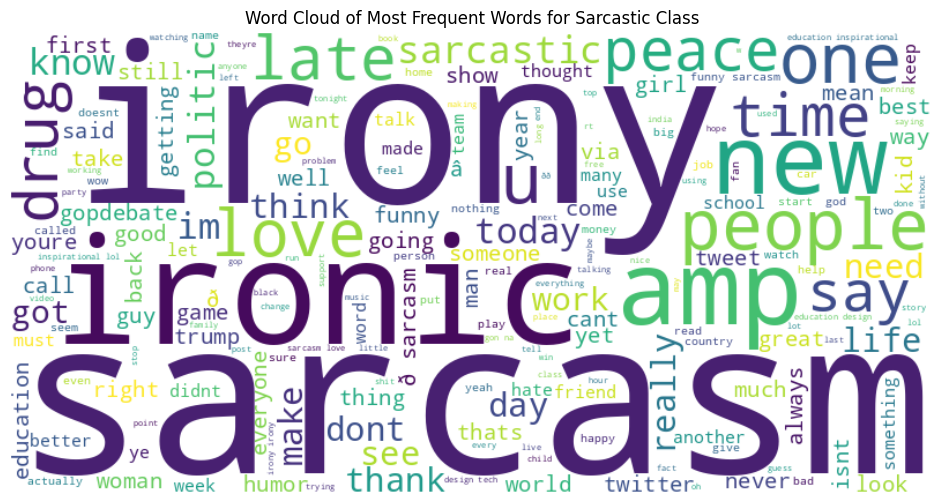

In [ ]:
wordcloud(sarcasm, 'Sarcastic')

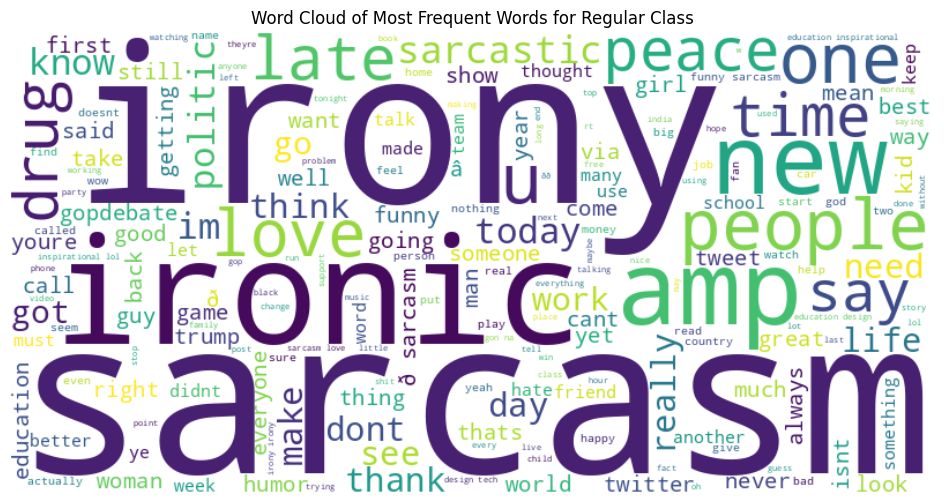

In [ ]:
wordcloud(regular, 'Regular')

In [ ]:
def get_feature_vector(train_fit):
    vector = TfidfVectorizer(sublinear_tf=True)
    vector.fit(train_fit)
    return vector

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tokenized_text = [' '.join(tokens) for tokens in cleaned_tweet['tweets']]

# TF-IDF Vectorization

In [ ]:
'''tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(tokenized_text)'''

'tfidf = TfidfVectorizer(max_features=5000)\nX_tfidf = tfidf.fit_transform(tokenized_text)'

In [ ]:
#
X = tokenized_text
y = cleaned_tweet['Label']

In [ ]:
#Splitting the data into test and train dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
#Transforming the Dataset Using TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vectoriser = TfidfVectorizer(ngram_range=(1,3), max_features=500000)
vectoriser.fit(x_train)

TfidfVectorizer(max_features=500000, ngram_range=(1, 3))

In [ ]:
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))

No. of feature_words:  500000


In [ ]:
#Transform the data using TF-IDF Vectorizer

x_train = vectoriser.transform(x_train)
x_test  = vectoriser.transform(x_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def model_Evaluate(model, x_test, y_test):
    # Predict values for Test dataset
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

#Model Building

In [ ]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
BNBmodel = BernoulliNB()
BNBmodel.fit(x_train, y_train)
model_Evaluate(BNBmodel,x_test,y_test)
y_pred1 = BNBmodel.predict(x_test)

Accuracy: 0.62
Classification Report:
              precision    recall  f1-score   support

           0       0.04      0.02      0.02      2129
           1       0.59      0.70      0.64      2137
           2       1.00      0.95      0.97      1821
           3       0.62      0.89      0.73      2049

    accuracy                           0.62      8136
   macro avg       0.56      0.64      0.59      8136
weighted avg       0.54      0.62      0.57      8136

Confusion Matrix:
[[  35 1029    2 1063]
 [ 636 1497    3    1]
 [   8   23 1727   63]
 [ 229    0    0 1820]]


In [ ]:
from sklearn.svm import LinearSVC
SVCmodel = LinearSVC()
SVCmodel.fit(x_train, y_train)
model_Evaluate(SVCmodel,x_test,y_test)
y_pred2 = SVCmodel.predict(x_test)

Accuracy: 0.58
Classification Report:
              precision    recall  f1-score   support

           0       0.04      0.02      0.03      2129
           1       0.57      0.64      0.61      2137
           2       0.98      1.00      0.99      1821
           3       0.59      0.72      0.65      2049

    accuracy                           0.58      8136
   macro avg       0.54      0.60      0.57      8136
weighted avg       0.53      0.58      0.55      8136

Confusion Matrix:
[[  51 1035   10 1033]
 [ 753 1377    7    0]
 [   0    0 1821    0]
 [ 560    0   16 1473]]


In [ ]:
from sklearn.linear_model import LogisticRegression
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(x_train, y_train)
model_Evaluate(LRmodel,x_test,y_test)
y_pred3 = LRmodel.predict(x_test)

Accuracy: 0.61
Classification Report:
              precision    recall  f1-score   support

           0       0.02      0.01      0.01      2129
           1       0.59      0.69      0.64      2137
           2       1.00      1.00      1.00      1821
           3       0.60      0.78      0.68      2049

    accuracy                           0.61      8136
   macro avg       0.55      0.62      0.58      8136
weighted avg       0.53      0.61      0.57      8136

Confusion Matrix:
[[  22 1044    4 1059]
 [ 652 1482    3    0]
 [   1    0 1820    0]
 [ 442    0    1 1606]]


# Word Embeddings

In [ ]:
pip install gensim

In [ ]:
from gensim.models import Word2Vec

X = tokenized_text
y = cleaned_tweet['Label']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
word2vec_model = Word2Vec(sentences=x_train + x_test, vector_size=100, window=5, min_count=1, workers=4)

In [ ]:
def calculate_doc_vectors(docs, model):
    doc_vectors = []
    for doc in docs:
        vectors = [model.wv[word] for word in doc if word in model.wv]
        if vectors:
            doc_vectors.append(sum(vectors) / len(vectors))
        else:
            doc_vectors.append([0] * model.vector_size)  # If no words in the model, use zero vector
    return doc_vectors

In [ ]:
X_train_w2v = calculate_doc_vectors(x_train, word2vec_model)
X_test_w2v = calculate_doc_vectors(x_test, word2vec_model)

In [ ]:
LRmodel = LogisticRegression(C=2, max_iter=1000, n_jobs=-1)
LRmodel.fit(X_train_w2v, y_train)

LogisticRegression(C=2, max_iter=1000, n_jobs=-1)

In [ ]:
model_Evaluate(LRmodel,X_test_w2v,y_test)
y_pred3 = LRmodel.predict(X_test_w2v)

Accuracy: 0.52
Classification Report:
              precision    recall  f1-score   support

           0       0.30      0.23      0.26      2129
           1       0.55      0.58      0.56      2137
           2       0.62      0.69      0.65      1821
           3       0.58      0.61      0.59      2049

    accuracy                           0.52      8136
   macro avg       0.51      0.53      0.52      8136
weighted avg       0.51      0.52      0.51      8136

Confusion Matrix:
[[ 498  681  245  705]
 [ 484 1232  333   88]
 [ 162  269 1259  131]
 [ 514   77  202 1256]]


In [ ]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train_w2v, y_train)
model_Evaluate(BNBmodel,X_test_w2v,y_test)
y_pred1 = BNBmodel.predict(X_test_w2v)

Accuracy: 0.43
Classification Report:
              precision    recall  f1-score   support

           0       0.31      0.14      0.20      2129
           1       0.40      0.46      0.43      2137
           2       0.48      0.58      0.52      1821
           3       0.45      0.56      0.50      2049

    accuracy                           0.43      8136
   macro avg       0.41      0.43      0.41      8136
weighted avg       0.41      0.43      0.41      8136

Confusion Matrix:
[[ 305  628  382  814]
 [ 321  975  457  384]
 [ 105  478 1059  179]
 [ 256  330  321 1142]]


In [ ]:
pip install keras

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
X = tokenized_text
y = cleaned_tweet['Label']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
max_words = 10000  # Adjust based on your dataset size
max_len = 100  # Adjust based on your maximum sequence length
tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(x_train)
X_train_seq = pad_sequences(tokenizer.texts_to_sequences(x_train), maxlen=max_len)
X_test_seq = pad_sequences(tokenizer.texts_to_sequences(x_test), maxlen=max_len)

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=100, input_length=max_len))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(4, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train_seq, y_train, epochs=5, batch_size=32, validation_split=0.2)

y_pred_proba = model.predict(X_test_seq)
y_pred = y_pred_proba.argmax(axis=-1)

Epoch 1/5
1831/1831 [==============================] - 293s 155ms/step - loss: 0.5397 - accuracy: 0.7275 - val_loss: 0.5099 - val_accuracy: 0.7302
Epoch 2/5
1831/1831 [==============================] - 265s 145ms/step - loss: 0.4957 - accuracy: 0.7407 - val_loss: 0.5106 - val_accuracy: 0.7279
Epoch 3/5
1831/1831 [==============================] - 276s 151ms/step - loss: 0.4878 - accuracy: 0.7436 - val_loss: 0.5253 - val_accuracy: 0.7232
Epoch 4/5
1831/1831 [==============================] - 271s 148ms/step - loss: 0.4714 - accuracy: 0.7510 - val_loss: 0.5473 - val_accuracy: 0.7166
Epoch 5/5
255/255 [==============================] - 10s 35ms/step


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

confusion_mat = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion_mat)

classification_rep = classification_report(y_test, y_pred)
print('Classification Report:')
print(classification_rep)

Accuracy: 0.69
Confusion Matrix:
[[ 120 1035    1  973]
 [ 174 1962    1    0]
 [   0    3 1815    3]
 [ 330    0    0 1719]]
Classification Report:
              precision    recall  f1-score   support

           0       0.19      0.06      0.09      2129
           1       0.65      0.92      0.76      2137
           2       1.00      1.00      1.00      1821
           3       0.64      0.84      0.72      2049

    accuracy                           0.69      8136
   macro avg       0.62      0.70      0.64      8136
weighted avg       0.61      0.69      0.63      8136

